# Preprocessing Pipeline Visualization

This notebook visualizes and explores the outputs from preprocessing scripts:
- `scripts/preprocess_fao_data.py` - FAO data preprocessing
- `scripts/preprocess_food_group_mapping.py` - Food group mapping
- `scripts/preprocess_obesity_data.py` - Obesity data preprocessing
- `scripts/create_panel_datasets.py` - Panel dataset creation
- `scripts/create_master_panel.py` - Master panel creation

## Objectives
1. Explore cleaned datasets
2. Visualize data quality and coverage
3. Understand data transformations
4. Verify preprocessing outputs


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up paths
PROJECT_ROOT = Path().resolve().parent
DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"
PROCESSED_DIR = DATA_DIR / "processed"

print("Paths configured successfully!")


Paths configured successfully!


## 1. Load and Explore Cleaned Datasets


In [ ]:
# Load cleaned datasets (using new folder structure)
datasets = {
    "FAO Nutrients": PROCESSED_DIR / "cleaned" / "Cleaned_FAO_Nutrients.csv",
    "FAO Population": PROCESSED_DIR / "cleaned" / "Cleaned_FAO_Population.csv",
    "Obesity": PROCESSED_DIR / "cleaned" / "Cleaned_Obesity.csv",
    "Food Group Mapping": PROCESSED_DIR / "mappings" / "Item_to_FoodGroup.csv",
    "Nutrient Panel": PROCESSED_DIR / "panels" / "nutrient_panel.csv",
    "Food Group Panel": PROCESSED_DIR / "panels" / "foodgroup_energy_panel.csv",
    "Master Panel": PROCESSED_DIR / "final" / "master_panel_final.csv"
}

loaded_data = {}
for name, path in datasets.items():
    if path.exists():
        print(f"\n✅ Loading {name}...")
        df = pd.read_csv(path, low_memory=False)
        loaded_data[name] = df
        print(f"   Shape: {df.shape}")
        print(f"   Columns: {list(df.columns)[:10]}...")  # Show first 10 columns
        display(df.head(3))
    else:
        print(f"⚠️  {name} not found at {path}")

print(f"\n\n📊 Loaded {len(loaded_data)} datasets")



✅ Loading FAO Nutrients...
   Shape: (905247, 11)
   Columns: ['country', 'year', 'item', 'item_code', 'food_group', 'element', 'element_code', 'unit_standard', 'value_standard', 'unit_original']...


,country,year,item,item_code,food_group,element,element_code,unit_standard,value_standard,unit_original,flag
0,Afghanistan,2010,Grand Total,2901,NaN,energy_kcal_day,664,kcal/capita/day,2200.21,kcal/cap/d,E
1,Afghanistan,2011,Grand Total,2901,NaN,energy_kcal_day,664,kcal/capita/day,2171.86,kcal/cap/d,E
2,Albania,2010,Grand Total,2901,NaN,energy_kcal_day,664,kcal/capita/day,3237.43,kcal/cap/d,E



✅ Loading FAO Population...
   Shape: (2901, 3)
   Columns: ['country', 'year', 'population']...


,country,year,population
0,Afghanistan,2010,28284090
1,Albania,2010,2928720
2,Afghanistan,2011,29347710



✅ Loading Obesity...
   Shape: (6402, 4)
   Columns: ['country', 'iso3', 'year', 'obesity_pct']...


,country,iso3,year,obesity_pct
0,Mali,MLI,2022,9.95
1,Guinea-Bissau,GNB,2022,10.08
2,Haiti,HTI,2022,10.23



✅ Loading Food Group Mapping...
   Shape: (108, 3)
   Columns: ['item', 'item_code', 'food_group']...


,item,item_code,food_group
0,Alcoholic Beverages,2924,Alcoholic Beverages
1,Beer,2656,Alcoholic Beverages
2,Beverages,2657,Alcoholic Beverages



✅ Loading Nutrient Panel...
   Shape: (2901, 6)
   Columns: ['country', 'year', 'energy_kcal_day', 'fat_g_day', 'protein_g_day', 'sugar_g_day']...


,country,year,energy_kcal_day,fat_g_day,protein_g_day,sugar_g_day
0,Afghanistan,2010,2200.21,37.93,65.54,NaN
1,Afghanistan,2011,2171.86,35.86,63.74,NaN
2,Afghanistan,2012,2165.88,37.34,62.67,NaN



✅ Loading Food Group Panel...
   Shape: (2901, 16)
   Columns: ['country', 'year', 'Alcoholic Beverages', 'Aquatic Products', 'Beverages', 'Cereals', 'Dairy & Eggs', 'Fruit and Vegetables', 'Meat', 'Nuts & Seeds']...


,country,year,Alcoholic Beverages,Aquatic Products,Beverages,Cereals,Dairy & Eggs,Fruit and Vegetables,Meat,Nuts & Seeds,Oils & Fats,Other,Pulses,Spices & Herbs,Starchy Roots,Sugar
0,Afghanistan,2010,0.30,0.25,0.00,3297.88,97.69,2090.30,330.92,43.80,278.53,219.45,34.81,1.53,23.52,89.94
1,Afghanistan,2011,0.25,0.29,0.01,3200.34,96.52,2065.92,317.21,46.53,252.67,258.39,35.73,2.85,20.10,128.08
2,Afghanistan,2012,0.25,0.33,0.01,3086.76,99.63,2067.97,320.19,44.25,287.09,288.66,35.60,3.06,22.50,147.32



✅ Loading Master Panel...
   Shape: (2144, 40)
   Columns: ['country', 'year', 'energy_kcal_day', 'fat_g_day', 'protein_g_day', 'sugar_g_day', 'Alcoholic Beverages', 'Aquatic Products', 'Beverages', 'Cereals']...


,country,year,energy_kcal_day,fat_g_day,protein_g_day,sugar_g_day,Alcoholic Beverages,Aquatic Products,Beverages,Cereals,...,Dairy & Eggs_share,Fruit and Vegetables_share,Meat_share,Nuts & Seeds_share,Oils & Fats_share,Other_share,Pulses_share,Spices & Herbs_share,Starchy Roots_share,Sugar_share
0,Afghanistan,2010,2200.21,37.93,65.54,NaN,0.30,0.25,0.00,3297.88,...,4.44,95.00,15.04,1.99,12.66,9.97,1.58,0.07,1.07,4.09
1,Afghanistan,2011,2171.86,35.86,63.74,NaN,0.25,0.29,0.01,3200.34,...,4.44,95.12,14.61,2.14,11.63,11.90,1.65,0.13,0.93,5.90
2,Afghanistan,2012,2165.88,37.34,62.67,NaN,0.25,0.33,0.01,3086.76,...,4.60,95.48,14.78,2.04,13.26,13.33,1.64,0.14,1.04,6.80




📊 Loaded 7 datasets


## 2. Data Coverage Analysis


📊 FAO Nutrients Coverage:
   Countries: 213
   Years: 2010 - 2023
   Elements: ['energy_kcal_day' 'protein_g_day' 'fat_g_day']
   Items: 117


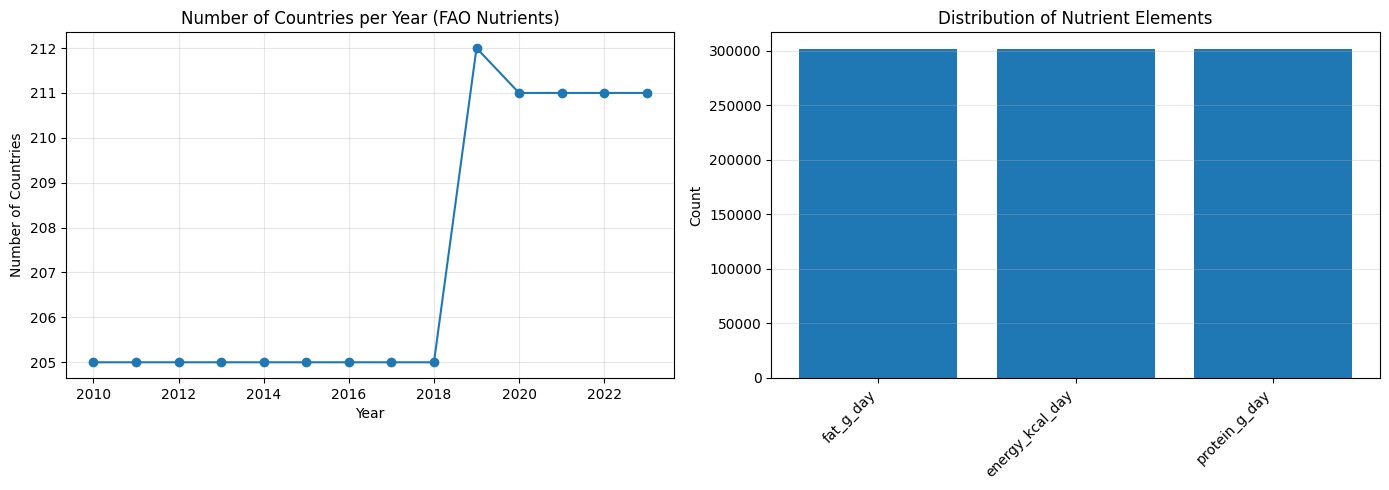


📊 Obesity Data Coverage:
   Countries: 194
   Years: 1990 - 2022


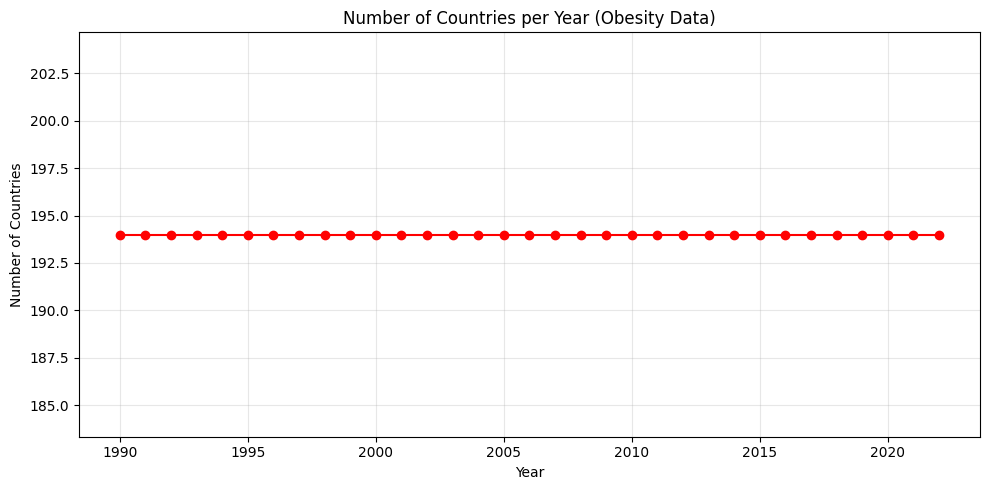

In [3]:
# Analyze data coverage across datasets
if "FAO Nutrients" in loaded_data:
    nut = loaded_data["FAO Nutrients"]
    print("📊 FAO Nutrients Coverage:")
    print(f"   Countries: {nut['country'].nunique()}")
    print(f"   Years: {int(nut['year'].min())} - {int(nut['year'].max())}")
    print(f"   Elements: {nut['element'].unique()}")
    print(f"   Items: {nut['item'].nunique()}")
    
    # Visualize coverage
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Countries per year
    country_year = nut.groupby('year')['country'].nunique()
    axes[0].plot(country_year.index, country_year.values, marker='o')
    axes[0].set_title('Number of Countries per Year (FAO Nutrients)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Countries')
    axes[0].grid(True, alpha=0.3)
    
    # Elements distribution
    element_counts = nut['element'].value_counts()
    axes[1].bar(range(len(element_counts)), element_counts.values)
    axes[1].set_xticks(range(len(element_counts)))
    axes[1].set_xticklabels(element_counts.index, rotation=45, ha='right')
    axes[1].set_title('Distribution of Nutrient Elements')
    axes[1].set_ylabel('Count')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

if "Obesity" in loaded_data:
    ob = loaded_data["Obesity"]
    print("\n📊 Obesity Data Coverage:")
    print(f"   Countries: {ob['country'].nunique()}")
    print(f"   Years: {int(ob['year'].min())} - {int(ob['year'].max())}")
    
    # Visualize obesity coverage
    country_year_ob = ob.groupby('year')['country'].nunique()
    plt.figure(figsize=(10, 5))
    plt.plot(country_year_ob.index, country_year_ob.values, marker='o', color='red')
    plt.title('Number of Countries per Year (Obesity Data)')
    plt.xlabel('Year')
    plt.ylabel('Number of Countries')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## 3. Food Group Mapping Analysis


📊 Food Group Mapping:
   Total items mapped: 108
   Unique food groups: 14

   Food groups: Fruit and Vegetables, Oils & Fats, Cereals, Aquatic Products, Pulses, Sugar, Meat, Nuts & Seeds, Other, Starchy Roots, Alcoholic Beverages, Dairy & Eggs, Beverages, Spices & Herbs


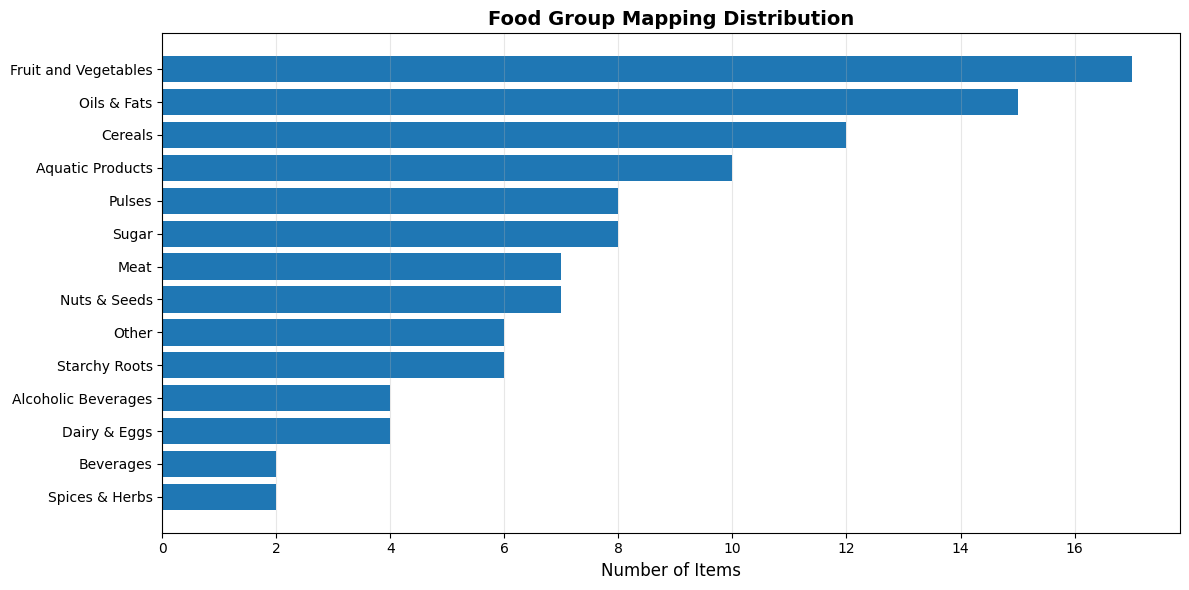

,Item Count
food_group,
Fruit and Vegetables,17
Oils & Fats,15
Cereals,12
Aquatic Products,10
Pulses,8
Sugar,8
Meat,7
Nuts & Seeds,7
Other,6


In [4]:
# Analyze food group mapping
if "Food Group Mapping" in loaded_data:
    mapping = loaded_data["Food Group Mapping"]
    print("📊 Food Group Mapping:")
    print(f"   Total items mapped: {len(mapping)}")
    print(f"   Unique food groups: {mapping['food_group'].nunique()}")
    
    # Food group distribution
    fg_counts = mapping['food_group'].value_counts()
    print(f"\n   Food groups: {', '.join(fg_counts.index.tolist())}")
    
    # Visualize food group distribution
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(fg_counts)), fg_counts.values)
    plt.yticks(range(len(fg_counts)), fg_counts.index)
    plt.xlabel('Number of Items', fontsize=12)
    plt.title('Food Group Mapping Distribution', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    display(fg_counts.to_frame(name='Item Count'))


## 4. Panel Dataset Analysis


📊 Master Panel Overview:
   Total rows: 2,144
   Countries: 171
   Years: 2010 - 2022
   Columns: 40

📋 Data Completeness:
   energy_kcal_day: 0.0% missing (0 rows)
   protein_g_day: 0.0% missing (0 rows)
   fat_g_day: 0.0% missing (0 rows)
   obesity_pct: 0.0% missing (0 rows)


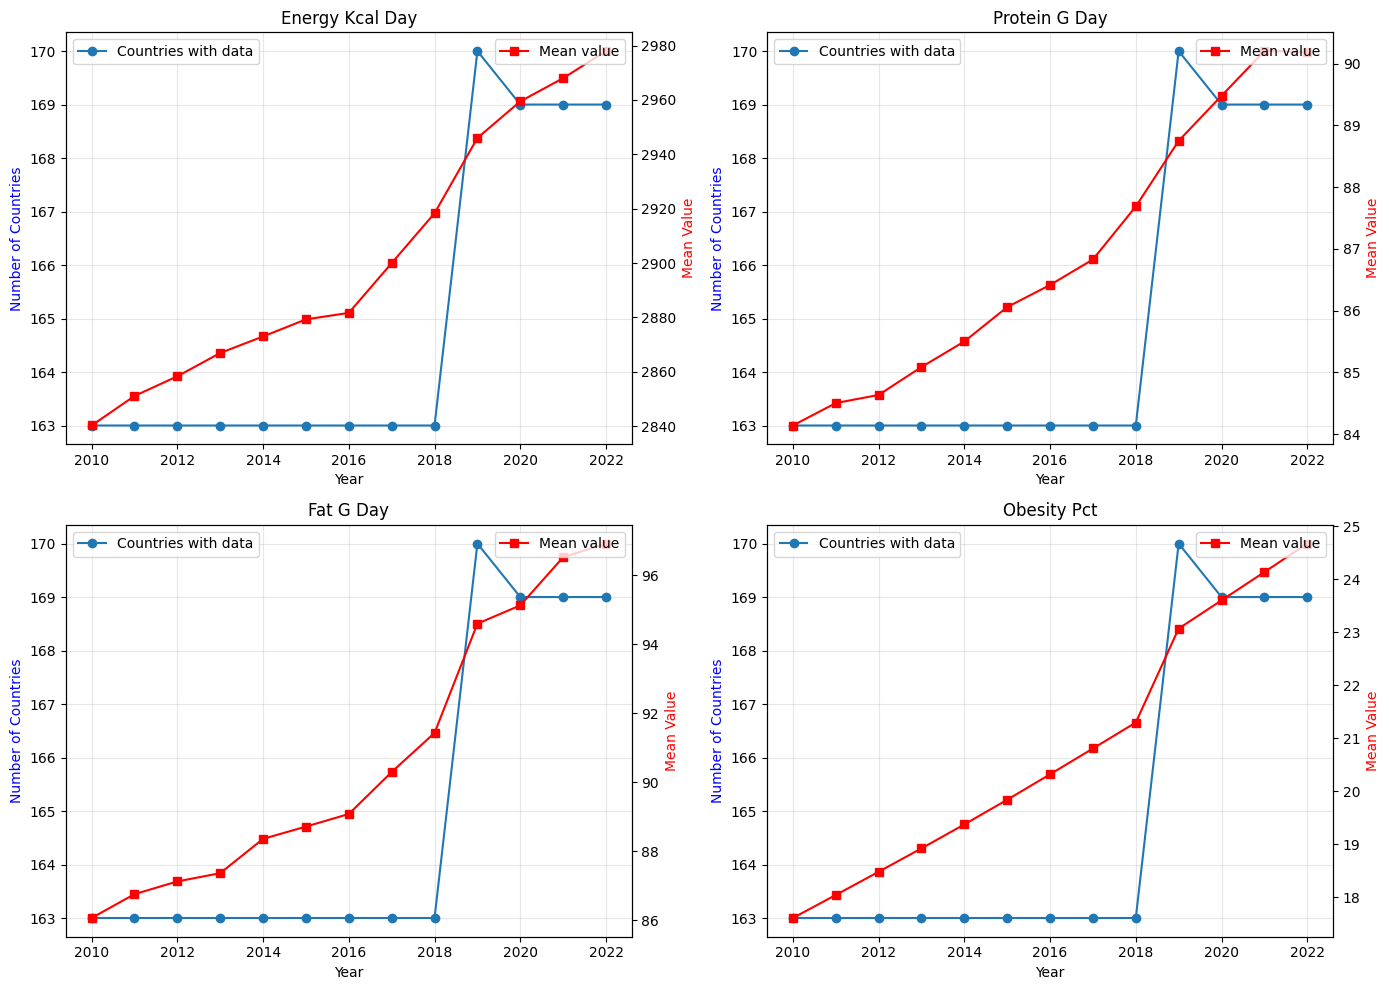

In [5]:
# Analyze panel datasets
if "Master Panel" in loaded_data:
    master = loaded_data["Master Panel"]
    print("📊 Master Panel Overview:")
    print(f"   Total rows: {len(master):,}")
    print(f"   Countries: {master['country'].nunique()}")
    print(f"   Years: {int(master['year'].min())} - {int(master['year'].max())}")
    print(f"   Columns: {len(master.columns)}")
    
    # Check completeness
    print("\n📋 Data Completeness:")
    key_cols = ['energy_kcal_day', 'protein_g_day', 'fat_g_day', 'obesity_pct']
    for col in key_cols:
        if col in master.columns:
            missing = master[col].isna().sum()
            missing_pct = (missing / len(master)) * 100
            print(f"   {col}: {missing_pct:.1f}% missing ({missing:,} rows)")
    
    # Visualize data completeness over time
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    for idx, col in enumerate(key_cols):
        if col in master.columns:
            ax = axes[idx // 2, idx % 2]
            yearly_data = master.groupby('year')[col].agg(['count', 'mean'])
            ax.plot(yearly_data.index, yearly_data['count'], marker='o', label='Countries with data')
            ax2 = ax.twinx()
            ax2.plot(yearly_data.index, yearly_data['mean'], marker='s', color='red', label='Mean value')
            ax.set_title(f'{col.replace("_", " ").title()}')
            ax.set_xlabel('Year')
            ax.set_ylabel('Number of Countries', color='blue')
            ax2.set_ylabel('Mean Value', color='red')
            ax.grid(True, alpha=0.3)
            ax.legend(loc='upper left')
            ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()


## 5. Data Quality Checks


In [6]:
# Perform data quality checks
if "Master Panel" in loaded_data:
    master = loaded_data["Master Panel"]
    
    print("🔍 Data Quality Checks:")
    
    # Check for negative values
    numeric_cols = master.select_dtypes(include=[np.number]).columns
    negative_check = {}
    for col in numeric_cols:
        if col not in ['year']:
            negative_count = (master[col] < 0).sum()
            if negative_count > 0:
                negative_check[col] = negative_count
    
    if negative_check:
        print("\n⚠️  Negative values found:")
        for col, count in negative_check.items():
            print(f"   {col}: {count} negative values")
    else:
        print("✅ No negative values found")
    
    # Check for outliers (using IQR method)
    print("\n📊 Outlier Detection (IQR method):")
    outlier_summary = {}
    for col in ['energy_kcal_day', 'protein_g_day', 'fat_g_day', 'obesity_pct']:
        if col in master.columns:
            Q1 = master[col].quantile(0.25)
            Q3 = master[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((master[col] < lower_bound) | (master[col] > upper_bound)).sum()
            outlier_summary[col] = {
                'outliers': outliers,
                'lower': lower_bound,
                'upper': upper_bound
            }
            print(f"   {col}: {outliers} outliers ({outliers/len(master)*100:.1f}%)")
    
    # Display summary statistics
    print("\n📈 Summary Statistics:")
    display(master[['energy_kcal_day', 'protein_g_day', 'fat_g_day', 'obesity_pct']].describe())


🔍 Data Quality Checks:
✅ No negative values found

📊 Outlier Detection (IQR method):
   energy_kcal_day: 0 outliers (0.0%)
   protein_g_day: 0 outliers (0.0%)
   fat_g_day: 0 outliers (0.0%)
   obesity_pct: 25 outliers (1.2%)

📈 Summary Statistics:


,energy_kcal_day,protein_g_day,fat_g_day,obesity_pct
count,2144.000000,2144.000000,2144.000000,2144.000000
mean,2902.267327,86.914506,90.697994,20.815630
std,453.455473,22.588592,36.229637,11.395376
min,1810.450000,28.280000,21.030000,0.670000
25%,2572.712500,67.450000,60.897500,11.797500
50%,2893.130000,88.385000,87.880000,21.185000
75%,3258.145000,104.522500,117.775000,27.670000
max,3966.570000,152.610000,188.270000,70.540000


## Summary

This notebook provides:
- ✅ Overview of all cleaned datasets
- ✅ Data coverage analysis
- ✅ Food group mapping visualization
- ✅ Panel dataset quality checks
- ✅ Data completeness assessment

**Note**: Run the preprocessing scripts first to generate the datasets explored here.
